# Data Overview – Fraud Detection Case

This notebook focuses on understanding the data from a **business and risk perspective**, 
rather than performing model-driven exploration.


Each row represents a single transaction.  
The target variable indicates whether the transaction was fraudulent.  
Due to privacy constraints, most features are anonymized.


In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)


In [14]:
# Try common paths
candidate_paths = [
    "creditcard.csv",
    os.path.join("data", "creditcard.csv"),
    os.path.join("dataset", "creditcard.csv"),
]

data_path = None
for p in candidate_paths:
    if os.path.exists(p):
        data_path = p
        break

if data_path is None:
    raise FileNotFoundError(
        "creditcard.csv not found. Put it in the repo root or in ./data/creditcard.csv"
    )

df = pd.read_csv(data_path)
print("Loaded:", data_path)
df.shape


Loaded: data/creditcard.csv


(284807, 31)

In [15]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
df.describe(include="all").T.head(20)


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.384974e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.494498e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.414189e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## Initial Observations (Business-first)

We are dealing with a high-volume transactional dataset.  
In fraud detection, the key challenge is typically **extreme class imbalance**, which makes naïve metrics (e.g., accuracy) misleading.



In [18]:
target_col = "Class"
if target_col not in df.columns:
    raise ValueError(f"Expected target column '{target_col}' not found in dataset.")

counts = df[target_col].value_counts().sort_index()
counts_df = pd.DataFrame({
    "class": counts.index,
    "count": counts.values
})
counts_df["ratio"] = counts_df["count"] / counts_df["count"].sum()

counts_df


,class,count,ratio
0,0,284315,0.998273
1,1,492,0.001727


In [19]:
fraud_rate = counts_df.loc[counts_df["class"] == 1, "ratio"].values[0]
nonfraud_rate = counts_df.loc[counts_df["class"] == 0, "ratio"].values[0]

print(f"Fraud rate: {fraud_rate:.4%}")
print(f"Non-fraud rate: {nonfraud_rate:.4%}")
print(f"Imbalance ratio (non-fraud : fraud) ≈ {nonfraud_rate / fraud_rate:.0f}:1")


Fraud rate: 0.1727%
Non-fraud rate: 99.8273%
Imbalance ratio (non-fraud : fraud) ≈ 578:1


## Class Imbalance (Why this matters)

### What the data shows
Fraud is a **tiny fraction** of total transactions.

### Why accuracy is misleading
A model can achieve >99% accuracy by predicting “non-fraud” for every transaction, while catching **zero** fraud.

### Business impact
- **False negatives (missed fraud):** direct financial loss  
- **False positives (blocked legit users):** lost revenue + poor customer experience  
- **Manual review:** operational cost and scalability bottleneck

> In highly imbalanced fraud datasets, **accuracy hides business risk** rather than revealing it.


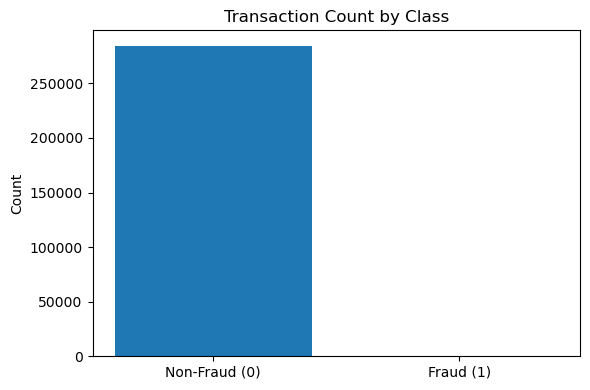

In [20]:
labels = ["Non-Fraud (0)", "Fraud (1)"]
values = [counts.get(0, 0), counts.get(1, 0)]

plt.figure(figsize=(6, 4))
plt.bar(labels, values)
plt.title("Transaction Count by Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


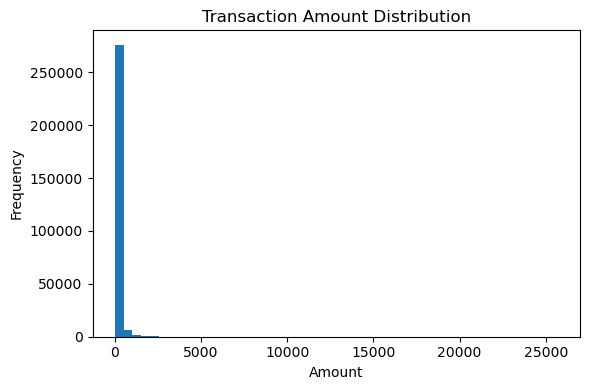

In [21]:
if "Amount" in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df["Amount"], bins=50)
    plt.title("Transaction Amount Distribution")
    plt.xlabel("Amount")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # Compare medians
    amount_summary = df.groupby(target_col)["Amount"].agg(["count", "mean", "median", "std"]).reset_index()
    amount_summary
else:
    print("Column 'Amount' not found; skipping amount distribution.")


## Practical Insight

A highly skewed amount distribution is common in payments.  
This is one reason why static threshold rules (e.g., "block if Amount > X") often fail:  
they can over-block legitimate behavior while missing fraud that occurs at smaller amounts.


Time min: 0.0
Time max: 172792.0


/var/folders/6q/jt3y72yn17xbsssh72w_nj700000gn/T/ipykernel_22440/1416313042.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_time = df_tmp.groupby("time_bin")[target_col].mean().reset_index()


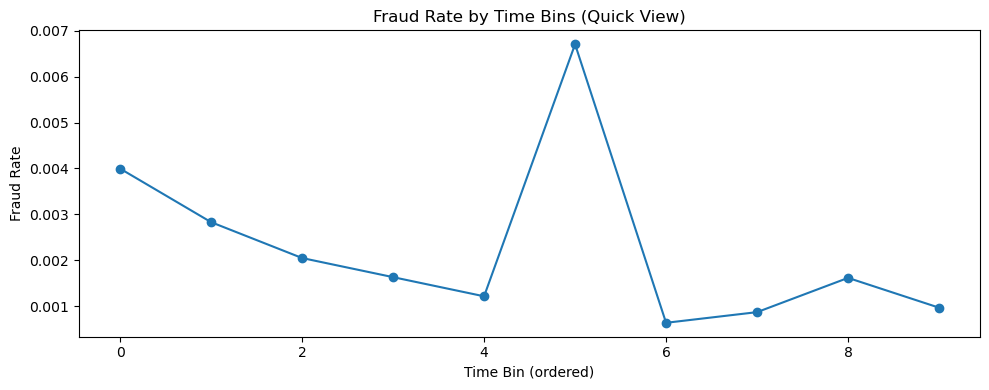

In [22]:
if "Time" in df.columns:
    # Simple check: time range
    print("Time min:", df["Time"].min())
    print("Time max:", df["Time"].max())

    # Fraud rate over time bins (quick view)
    df_tmp = df.copy()
    df_tmp["time_bin"] = pd.cut(df_tmp["Time"], bins=10)
    fraud_by_time = df_tmp.groupby("time_bin")[target_col].mean().reset_index()

    plt.figure(figsize=(10, 4))
    plt.plot(range(len(fraud_by_time)), fraud_by_time[target_col].values, marker="o")
    plt.title("Fraud Rate by Time Bins (Quick View)")
    plt.xlabel("Time Bin (ordered)")
    plt.ylabel("Fraud Rate")
    plt.tight_layout()
    plt.show()

    fraud_by_time.head()
else:
    print("Column 'Time' not found; skipping time-based view.")


## Operational Thinking (Decision, not just prediction)

Fraud detection is not a single binary output in real life.  
A practical system usually needs **three outcomes**:

- **Auto-block** (high confidence fraud)
- **Manual review** (uncertain but risky)
- **Allow** (low risk)

This implies that threshold selection should optimize a **business cost function** that balances:
fraud losses, false positives (conversion loss), and review capacity.


## Key Takeaways

- Fraud is a very small fraction of transactions but represents significant financial risk.
- Accuracy is misleading in this setting; we need metrics aligned with cost and risk (recall/precision, review rate).
- Real-world fraud systems require operational decisioning (block / review / allow), not just model outputs.
